In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns
import networkx as nx
from scipy.stats import uniform

<AxesSubplot:>

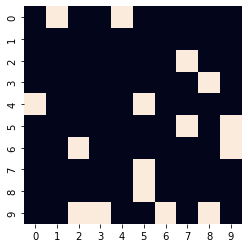

In [ ]:
# Implemente a random graph
# Erdos-Renyi

N = 10  # number of nodes
p = 0.2  # probability of connection between nodes i-->j
adj_matrix = bernoulli.rvs(p, size=(N, N))  # adjacency matrix
# remove self connections
np.fill_diagonal(adj_matrix, 0)
sns.heatmap(adj_matrix, square=True, cbar=False)

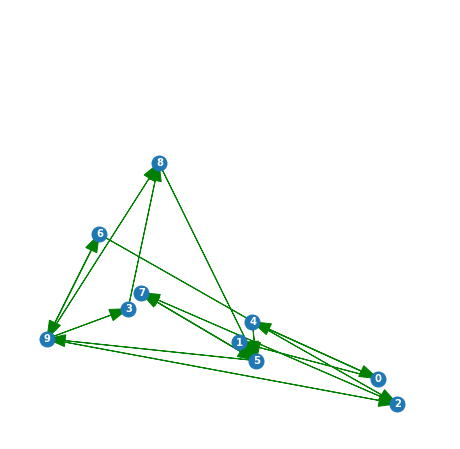

In [ ]:
def draw_egde(a, b):
    # Connect points a and b with an arrow -->
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1],
    head_width=0.06, length_includes_head=True, color='green'
    )

x = uniform.rvs(size=N)*2
y = uniform.rvs(size=N)*2

# adjacency list
adj_list = {ni: np.where(node)[0] for ni, node in enumerate(adj_matrix)}

plt.figure(figsize=(8,8))
plt.plot(x, y, '.', ms=30)
a = plt.xlim(-0.1, 2.1)
a = plt.ylim(-0.1, 2.1)
a = plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, weight='bold', c='w')
# a: node of origin, b: destination node. a --> b
e = [draw_egde([x[a], y[a]], [x[b], y[b]]) for a in adj_list for b in adj_list[a]]

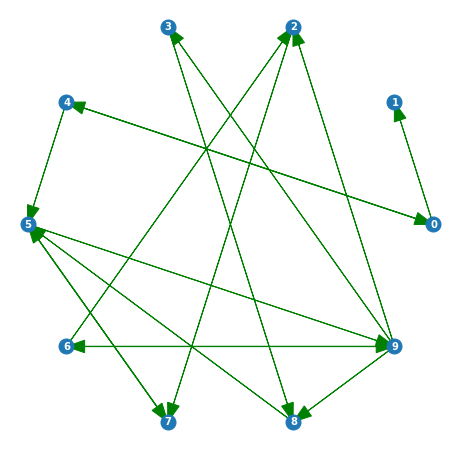

In [ ]:
def draw_egde(a, b):
    # Connect points a and b with an arrow -->
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1],
    head_width=0.06, length_includes_head=True, color='green'
    )

t = np.linspace(0, 2*np.pi, N, endpoint=False)  # angle in radians
# Convert from polar to cartesian 
x = np.cos(t)
y = np.sin(t)

# adjacency list
adj_list = {ni: np.where(node)[0] for ni, node in enumerate(adj_matrix)}

plt.figure(figsize=(8,8))
plt.plot(x, y, '.', ms=30)
#a = plt.xlim(-0.1, 2.1)
#a = plt.ylim(-0.1, 2.1)
a = plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, weight='bold', c='w')
# a: node of origin, b: destination node. a --> b
e = [draw_egde([x[a], y[a]], [x[b], y[b]]) for a in adj_list for b in adj_list[a]]

0 : [4 1]
1 : [0 2]
2 : [1 3]
3 : [2 4]
4 : [3 0]


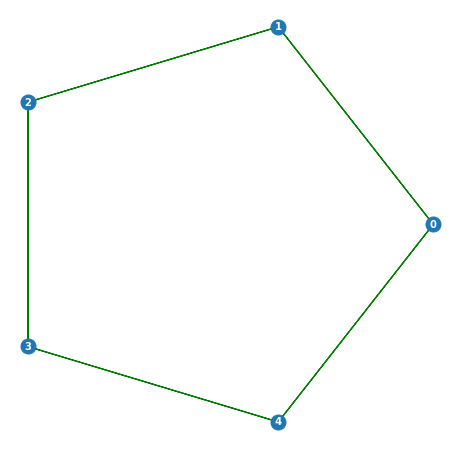

In [ ]:
def draw_egde(a, b, hw=0.0, color="green"):
    # Connect points a and b with an arrow -->
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1],
    head_width=hw, length_includes_head=True, color=color
    )

def make_ring(N, K):
    # N: nodes, K: degree, avg connections per node
    # N: nodes 
    # K: neighbors, K//2 at left, K//2 at right

    # Make ring connectivity
    adj_list = []
    for ni in range(N):
        adj_list += [[]]
        for ki in range(1,K//2+1):
            adj_list[ni] += [ni-ki, ni+ki]

    adj_list = np.array([np.array(ai) for ai in adj_list])

    # Correct borders to create closed condtion
    pos = np.where(adj_list<0)
    adj_list[pos] = adj_list[pos] + N
    pos = np.where(adj_list>=N)
    adj_list[pos] = adj_list[pos] - N

    return adj_list

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):
    t = np.linspace(0, 2*np.pi, N, endpoint=False)  # angle in radians
    # Convert from polar to cartesian 
    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(8,8))
    plt.plot(x, y, '.', ms=30)
    #a = plt.xlim(-0.1, 2.1)
    #a = plt.ylim(-0.1, 2.1)
    a = plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, weight='bold', c='w')
    # a: node of origin, b: destination node. a --> b
    e = [draw_egde([x[a], y[a]], [x[b], y[b]], hw) for a in adj_list for b in adj_list[a]]

    if rewired_arcs is not None:
        e = [draw_egde([x[a], y[a]], [x[b], y[b]], hw, 'red') 
            for a in rewired_arcs for b in rewired_arcs[a]]


N = 5
K = 2

C = make_ring(N, K)  # regular ring
adj_list_dict = {ni: nodes for ni, nodes in enumerate(C)}
plot_circular_layout(adj_list_dict)
for i,ci in enumerate(C):
    print(i, ':', ci)

<AxesSubplot:>

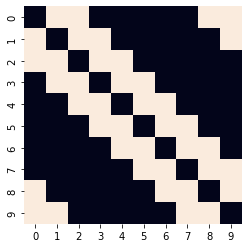

In [ ]:
# Adjacency matrix, connectivity matrix C
C = np.zeros((N, N), dtype='int')
for node in adj_list_dict:
    for neighbor in adj_list_dict[node]:
        C[node, neighbor] = 1
sns.heatmap(C, cbar=False, square=True)

In [ ]:
adj_list

array([[9, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 0, 4],
       [2, 4, 1, 5],
       [3, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 4, 8],
       [6, 8, 5, 9],
       [7, 9, 6, 0],
       [8, 0, 7, 1]])

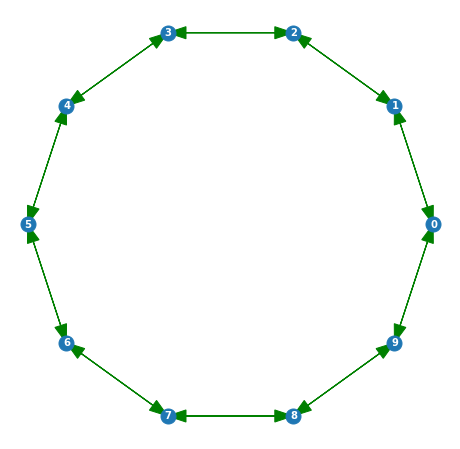

In [ ]:
def rewire_ring(C, omega):
    # C: adjacecy list, omega: K_r / K, fraction of random shortcuts
    # loop over nodes
    all_nodes = set(range(len(C)))
    for i, ci in enumerate(C):
        # loop over neighborhood
        for j, cj in enumerate(ci):
            # rewire if U(0,1) < omega
            if np.random.random() < omega:
                available_nodes = list(all_nodes - (set([i] + list(ci)) - set([cj])))
                C[i, j] = np.random.choice(available_nodes)

N = 10
K = 2
SW = make_ring(N, K)  # small-world, starst with a ring
rewire_ring(SW, 0)  # rewire SW
adj_list_dict = {ni: nodes for ni, nodes in enumerate(SW)}

Ring = make_ring(N, K)  # regular ring

rewired_arcs = {i: list(set(SW[i]) - set(Ring[i])) for i in range(N)}

plot_circular_layout(adj_list_dict, hw=0.06, rewired_arcs=rewired_arcs)

In [ ]:
Ring

array([[9, 1],
       [0, 2],
       [1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7],
       [6, 8],
       [7, 9],
       [8, 0]])

In [ ]:
all_nodes = set(range(len(C)))
list(all_nodes - (set([0] + [9, 1, 8, 2]) - set([9])))

[3, 4, 5, 6, 7, 9]

# TO DO

- Plot the Ring Matrix using seaborn, sns
- Try to implement a 1D small-world (Watts-Strogatz)
- Review the class materials, week 1 and 2.

Check: https://github.com/benmaier/smallworld

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

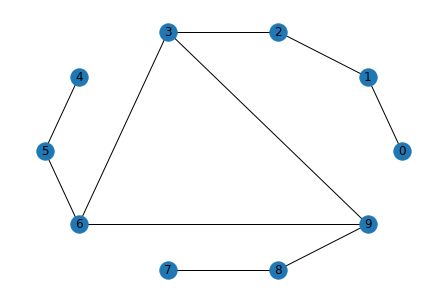

In [ ]:
R = nx.watts_strogatz_graph(10, 2, 0.2)
nx.draw_circular(R, with_labels=True, connectionstyle='arc3,rad=0.5')
R.nodes()

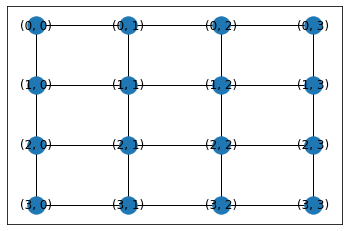

In [ ]:
G = nx.grid_2d_graph(4,4)
pos = {(x,y):(y,-x) for x,y in G.nodes}
# Draw nodes and edges
n = nx.draw_networkx_nodes(G, pos)

# edges
e = nx.draw_networkx_edges(G, pos)

# node labels
l = nx.draw_networkx_labels(G, pos)

### Homework

- **Start with a 2D grid** 
  - See heatmap below for the adjacency matrix of a 2D grid with $N=\text{width} \times \text{height} = 100$ nodes, $\text{width} = \text{height}=10$.
  - The regular connectivity starts with $K=8$ connections per node. 


<AxesSubplot:>

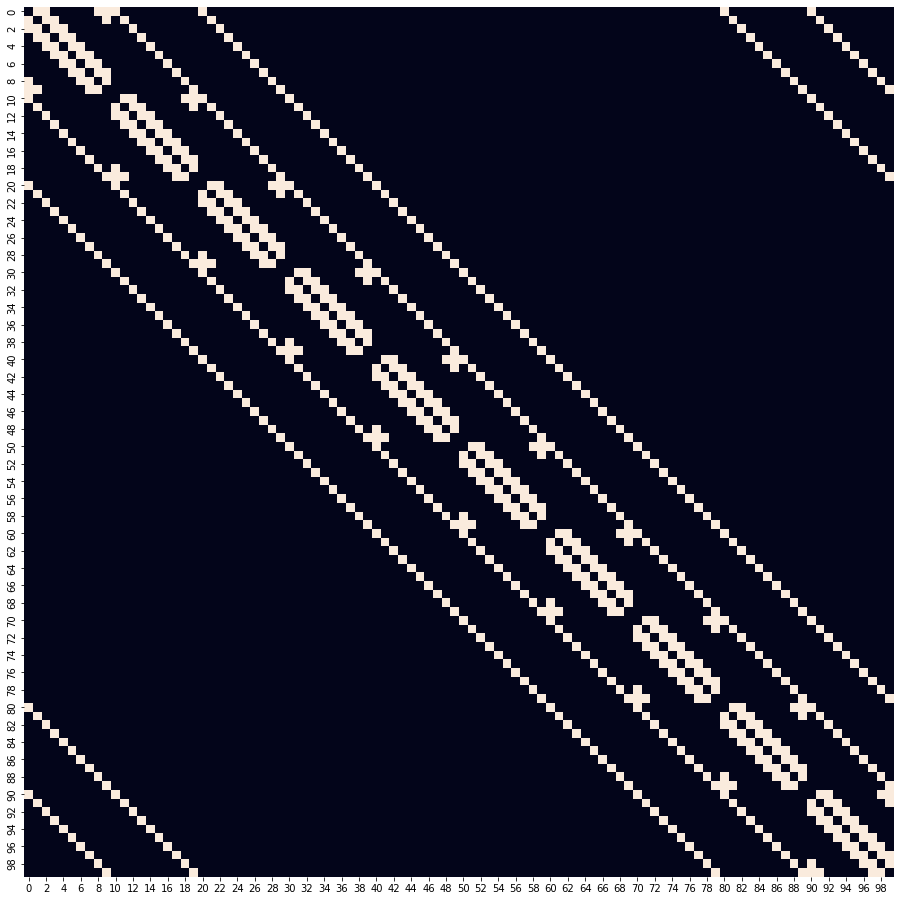

In [ ]:
# reading a dictionary from a file
with open('../grid.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
grid_2D = eval(data)

C = np.zeros((len(grid_2D), len(grid_2D)), dtype='int')  # adjacency matrix

for node in grid_2D: 
    for neighbor in grid_2D[node]:
        C[node, neighbor] = 1
plt.figure(figsize=(16,16))
sns.heatmap(C, cbar=False, square=True)

### Regular graph ploted in a 2D grid layout

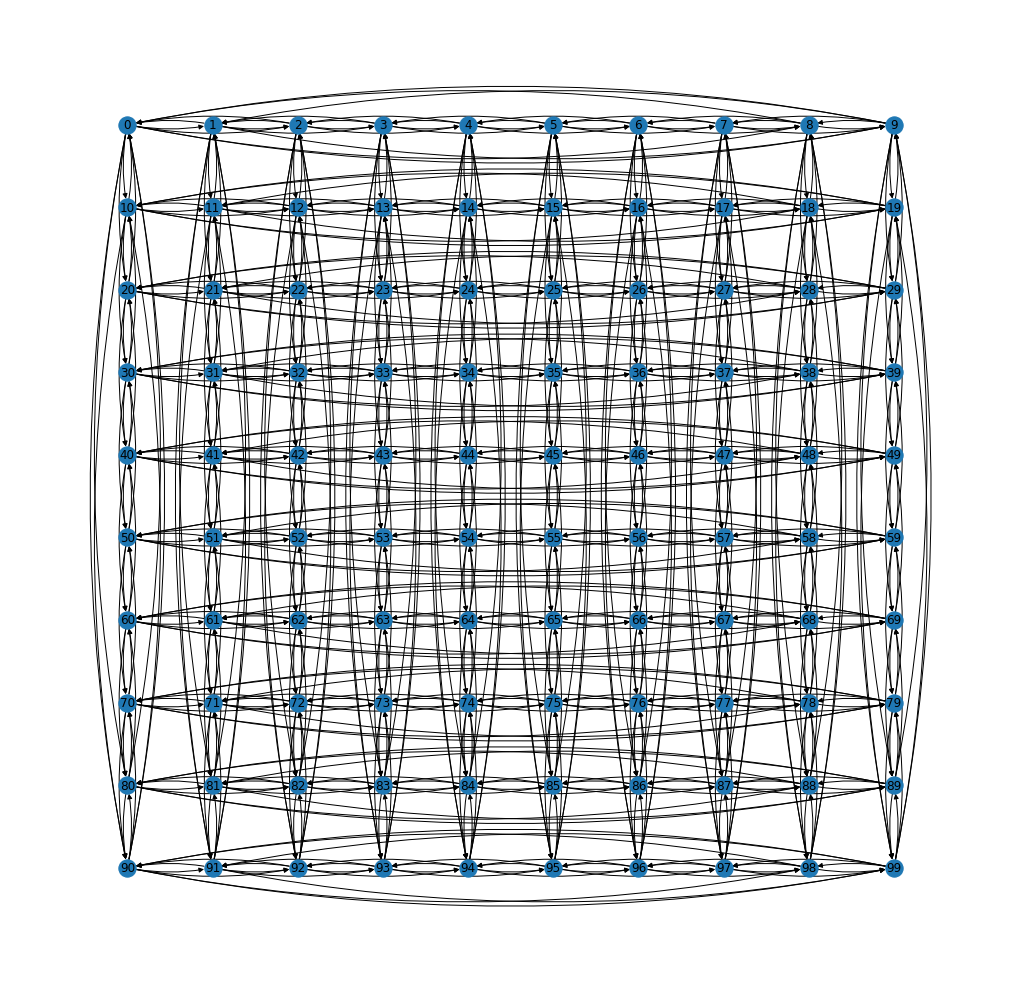

In [ ]:
def new_add_edge(G, a, b, d_rad=0.1):
    max_rad = 0
    G.add_edge(a, b, rad=max_rad+d_rad)
    
G = nx.DiGraph()  # create directed graph

for node in grid_2D:
    G.add_node(node)

for node in grid_2D:
    for neighbor in grid_2D[node]:
        new_add_edge(G, node, neighbor, 0.1)

plt.figure(figsize=(18,18))

grid_width = 10
pos = {x*grid_width + y: (y,-x) for x in range(grid_width) for y in range(grid_width)}

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

a = plt.axis('off')

### Read Small-World graph.

- The regular graph above is rewired and the result can be observed below.

In [ ]:
# reading the data from the file, omega=0.05
with open('../grid_w05.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
grid_sw = eval(data)

# reading the data from the file
with open('../rewired_arcs.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
rewired_arcs = eval(data)

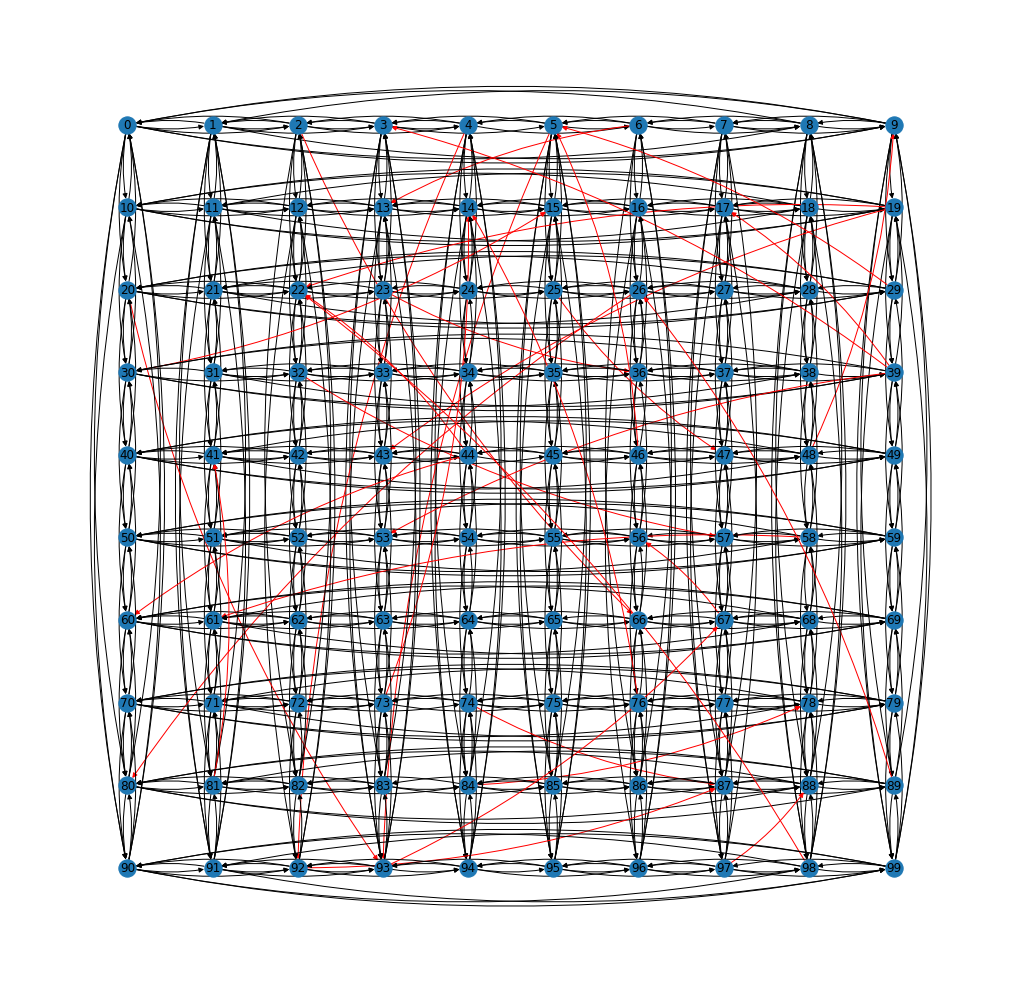

In [ ]:
G = nx.DiGraph()

for node in grid_sw:
    G.add_node(node)

for node in grid_sw:
    for neighbor in grid_sw[node]:
        new_add_edge(G, node, neighbor, 0.1)

plt.figure(figsize=(18,18))

grid_width = 10
pos = {x*grid_width + y: (y,-x) for x in range(grid_width) for y in range(grid_width)}

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data=True):
    if (edge[0], edge[1]) in rewired_arcs:
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], edge_color='r',
                               connectionstyle=f'arc3, rad = {edge[2]["rad"]}')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], 
                               connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

a = plt.axis('off')

<AxesSubplot:>

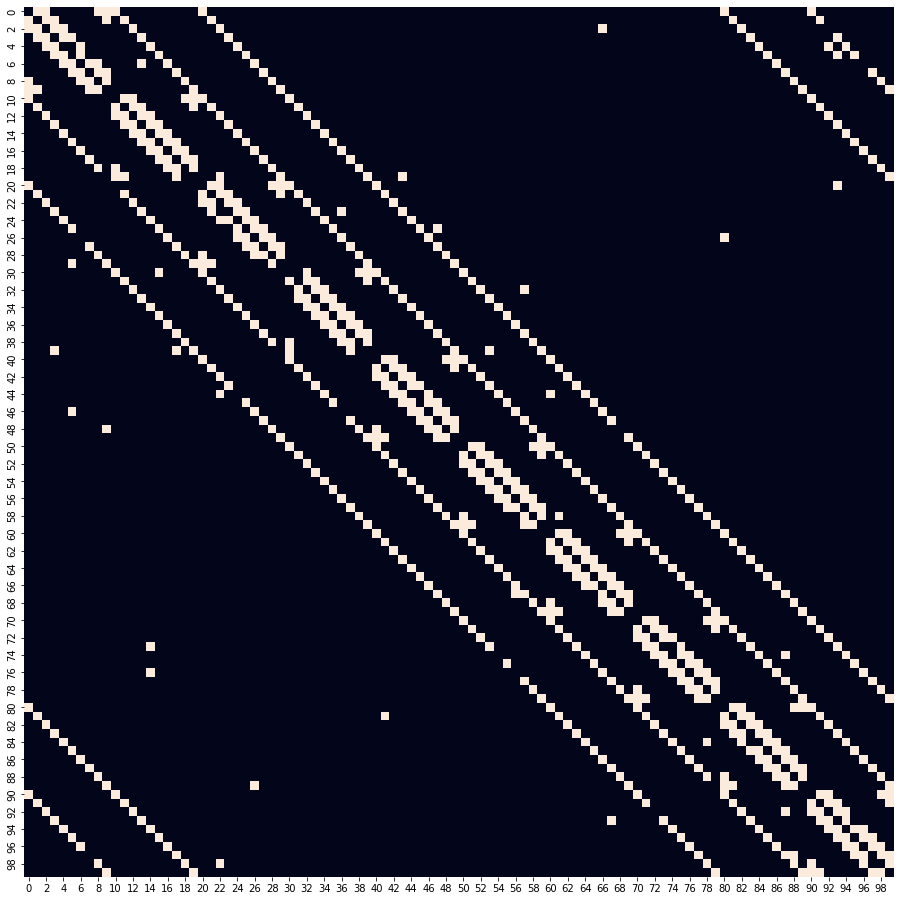

In [ ]:
C = np.zeros((len(grid_sw), len(grid_sw)), dtype='int')  # adjacency matrix

for node in grid_sw: 
    for neighbor in grid_sw[node]:
        C[node, neighbor] = 1
plt.figure(figsize=(16,16))
sns.heatmap(C, cbar=False, square=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>